# Salinla Charintara, 706092622

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y = pd.read_csv("AAPL_quarterly_financials.csv")
y.head()

,name,ttm,09/30/2023,06/30/2023,03/31/2023,12/31/2022,09/30/2022,06/30/2022,03/31/2022,12/31/2021,...,12/31/1987,09/30/1987,06/30/1987,03/31/1987,12/31/1986,09/30/1986,06/30/1986,03/31/1986,12/31/1985,09/30/1985
0,TotalRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
1,\tOperatingRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
2,CostOfRevenue,"214,137,000,000","49,071,000,000","45,384,000,000","52,860,000,000","66,822,000,000","52,051,000,000","47,074,000,000","54,719,000,000","69,702,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GrossProfit,"169,148,000,000","40,427,000,000","36,413,000,000","41,976,000,000","50,332,000,000","38,095,000,000","35,885,000,000","42,559,000,000","54,243,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OperatingExpense,"54,847,000,000","13,458,000,000","13,415,000,000","13,658,000,000","14,316,000,000","13,201,000,000","12,809,000,000","12,580,000,000","12,755,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
y.index = y.name

In [4]:
# Extract the row labeled "BasicEPS"
y = y.loc["BasicEPS", :]
y.head()

name          BasicEPS
ttm               6.16
09/30/2023        1.47
06/30/2023        1.27
03/31/2023        1.53
Name: BasicEPS, dtype: object

In [5]:
# Remove the first two columns from the extracted row
y = y.iloc[2:]
y.head()

09/30/2023    1.47
06/30/2023    1.27
03/31/2023    1.53
12/31/2022    1.89
09/30/2022    1.29
Name: BasicEPS, dtype: object

In [6]:
# Convert the resulting Series back into a DataFrame
y = pd.DataFrame(y)
y.head()

,BasicEPS
09/30/2023,1.47
06/30/2023,1.27
03/31/2023,1.53
12/31/2022,1.89
09/30/2022,1.29


In [7]:
# convert to a datetime format.
y.index = pd.to_datetime(y.index)
y.head()

,BasicEPS
2023-09-30,1.47
2023-06-30,1.27
2023-03-31,1.53
2022-12-31,1.89
2022-09-30,1.29


In [8]:
y = y.sort_index()
y.head()

,BasicEPS
1985-09-30,NaN
1985-12-31,0.004
1986-03-31,0.002
1986-06-30,0.002
1986-09-30,NaN


In [9]:
# Fill NaN with zeros
y = y.fillna(0.0)
y

,BasicEPS
1985-09-30,0.0
1985-12-31,0.004
1986-03-31,0.002
1986-06-30,0.002
1986-09-30,0.0
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [10]:
from pytrends.request import TrendReq 

In [11]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "Apple Store", "MacBook", "Apple stock", "iPad", "Apple Watch", "Weather forecast", "Local sports", "Holiday recipes"]

start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    if keyword in interest_over_time_df:
        df[keyword] = interest_over_time_df[keyword]

In [12]:
df

,iPhone,Apple Store,MacBook,Apple stock,iPad,Apple Watch,Weather forecast,Local sports,Holiday recipes
date,,,,,,,,,
2004-01-01,0,6,0,2,0,0,29,86,6
2004-02-01,0,5,0,1,0,0,22,77,2
2004-03-01,0,6,0,2,0,0,22,63,5
2004-04-01,0,6,0,1,0,0,29,67,1
2004-05-01,0,6,0,1,0,0,31,59,2
...,...,...,...,...,...,...,...,...,...
2023-09-01,65,27,85,31,24,83,32,73,1
2023-10-01,51,23,83,22,22,70,29,69,2
2023-11-01,49,22,90,24,24,81,27,63,7


In [13]:
# Resample with a frequency of quarterly
df = df.resample("Q").mean()
df.head(10)

,iPhone,Apple Store,MacBook,Apple stock,iPad,Apple Watch,Weather forecast,Local sports,Holiday recipes
date,,,,,,,,,
2004-03-31,0.0,5.666667,0.000000,1.666667,0.0,0.0,24.333333,75.333333,4.333333
2004-06-30,0.0,6.333333,0.000000,1.000000,0.0,0.0,31.333333,61.666667,2.333333
2004-09-30,0.0,8.000000,0.000000,1.333333,0.0,0.0,32.000000,74.000000,3.666667
2004-12-31,0.0,10.000000,0.000000,2.666667,0.0,0.0,23.000000,79.333333,56.333333
2005-03-31,0.0,10.666667,0.000000,5.333333,0.0,0.0,27.000000,67.000000,4.666667
2005-06-30,0.0,9.333333,0.000000,2.666667,0.0,0.0,34.333333,62.333333,3.333333
2005-09-30,0.0,12.000000,0.000000,2.666667,0.0,0.0,36.000000,61.666667,3.333333
2005-12-31,0.0,17.000000,0.000000,4.666667,0.0,0.0,23.333333,82.666667,52.333333
2006-03-31,0.0,11.666667,10.666667,5.000000,0.0,0.0,24.000000,83.666667,3.000000


In [14]:
X = df

In [15]:
# ALIGN DATA
temp = pd.concat([y, X],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

In [16]:
y

,BasicEPS
2004-03-31,0.002
2004-06-30,0.003
2004-09-30,0.0
2004-12-31,0.013
2005-03-31,0.013
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


In [17]:
X

,iPhone,Apple Store,MacBook,Apple stock,iPad,Apple Watch,Weather forecast,Local sports,Holiday recipes
2004-03-31,0.000000,5.666667,0.000000,1.666667,0.000000,0.000000,24.333333,75.333333,4.333333
2004-06-30,0.000000,6.333333,0.000000,1.000000,0.000000,0.000000,31.333333,61.666667,2.333333
2004-09-30,0.000000,8.000000,0.000000,1.333333,0.000000,0.000000,32.000000,74.000000,3.666667
2004-12-31,0.000000,10.000000,0.000000,2.666667,0.000000,0.000000,23.000000,79.333333,56.333333
2005-03-31,0.000000,10.666667,0.000000,5.333333,0.000000,0.000000,27.000000,67.000000,4.666667
...,...,...,...,...,...,...,...,...,...
2022-09-30,52.000000,23.000000,83.666667,29.333333,23.000000,78.333333,38.666667,58.666667,2.000000
2022-12-31,49.333333,24.333333,76.666667,27.666667,26.333333,83.666667,35.000000,63.000000,9.666667
2023-03-31,50.000000,20.000000,79.666667,32.666667,23.000000,67.666667,34.000000,64.000000,1.333333
2023-06-30,43.666667,17.666667,69.333333,28.000000,20.666667,63.333333,35.666667,57.666667,1.000000


# 3.) Normalize all the X data

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_scaled

array([[-1.82950879, -1.5194457 , -2.38329818, -1.03218356, -1.13443434,
        -0.83935499, -1.56639656,  1.94515394, -0.31158385],
       [-1.82950879, -1.48165688, -2.38329818, -1.07775076, -1.13443434,
        -0.83935499, -0.85502183,  0.39181232, -0.46001677],
       [-1.82950879, -1.38718481, -2.38329818, -1.05496716, -1.13443434,
        -0.83935499, -0.78727186,  1.79360842, -0.36106149],
       [-1.82950879, -1.27381832, -2.38329818, -0.96383276, -1.13443434,
        -0.83935499, -1.70189651,  2.39979051,  3.54767185],
       [-1.82950879, -1.2360295 , -2.38329818, -0.78156397, -1.13443434,
        -0.83935499, -1.29539666,  0.99799442, -0.28684504],
       [-1.82950879, -1.31160715, -2.38329818, -0.96383276, -1.13443434,
        -0.83935499, -0.55014694,  0.46758508, -0.38580031],
       [-1.82950879, -1.16045184, -2.38329818, -0.96383276, -1.13443434,
        -0.83935499, -0.38077201,  0.39181232, -0.38580031],
       [-1.82950879, -0.87703564, -2.38329818, -0.82713117, -1

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [51]:
# Split data into training (80%) and temporary data (20%)
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Split the temporary data into testing (15%) and holdout (5%)
X_test, X_holdout, y_test, y_holdout = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


In [52]:
# Lasso regression model with lambda set to 0.5
lasso_model = Lasso(alpha=0.5)

# Fit the model to the training data
lasso_model.fit(X_train_temp, y_train_temp)
y_pred_test = lasso_model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Mean Squared Error on Testing Data: {mse_test}")

Mean Squared Error on Testing Data: 0.2713355227387251


In [54]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred_test)
print(f"R-squared: {r_squared}")

R-squared: -0.03546415645602541


In [46]:
# coefficients of the Lasso model
lasso_coefficients = lasso_model.coef_


feature_names = list(df.columns)
for feature, coefficient in zip(feature_names, lasso_coefficients):
    print(f"Feature: {feature}, Coefficient: {coefficient}")


Feature: iPhone, Coefficient: 0.0
Feature: Apple Store, Coefficient: -0.0
Feature: MacBook, Coefficient: 0.0
Feature: Apple stock, Coefficient: 0.0
Feature: iPad, Coefficient: 0.0
Feature: Apple Watch, Coefficient: 0.0
Feature: Weather forecast, Coefficient: -0.0
Feature: Local sports, Coefficient: -0.0
Feature: Holiday recipes, Coefficient: -0.0


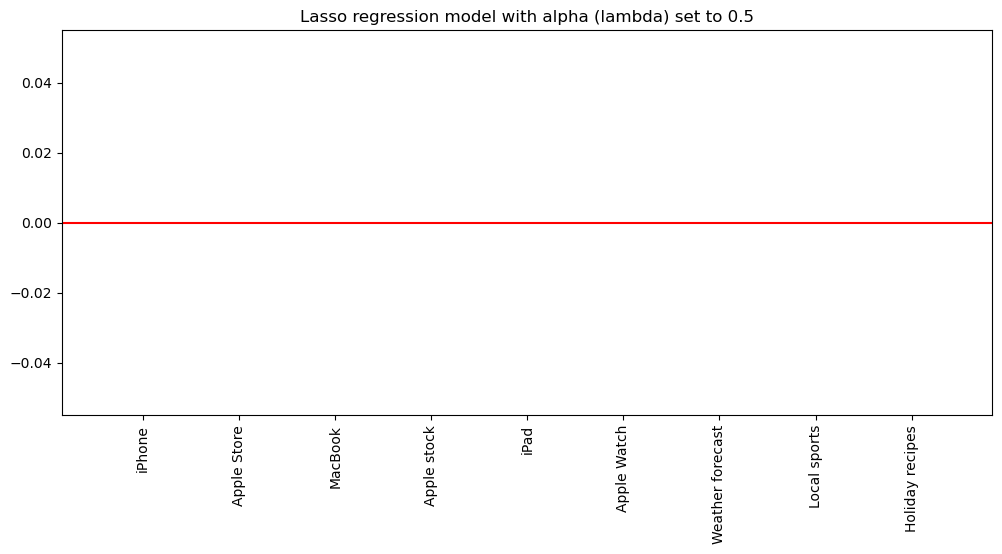

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.bar(range(len(lasso_coefficients)), lasso_coefficients)
plt.xticks(range(len(lasso_coefficients)), X.columns, rotation='vertical')
plt.axhline(0, color="red")
plt.title('Lasso regression model with alpha (lambda) set to 0.5')
plt.show()

In [56]:
# Try different Lamda
# Lasso regression model with lambda set to 0.01
lasso_model = Lasso(alpha=0.01)

lasso_model.fit(X_train_temp, y_train_temp)

y_pred_test = lasso_model.predict(X_test)


from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Mean Squared Error on Testing Data: {mse_test}")

Mean Squared Error on Testing Data: 0.02409315839084764


In [58]:
r_squared = r2_score(y_test, y_pred_test)
print(f"R-squared: {r_squared}")

R-squared: 0.9080562630438807


In [57]:
lasso_coefficients = lasso_model.coef_
feature_names = list(df.columns)

for feature, coefficient in zip(feature_names, lasso_coefficients):
    print(f"Feature: {feature}, Coefficient: {coefficient}")


Feature: iPhone, Coefficient: 0.0
Feature: Apple Store, Coefficient: 0.009422405229451647
Feature: MacBook, Coefficient: 0.006041086529761933
Feature: Apple stock, Coefficient: -0.02768453332770648
Feature: iPad, Coefficient: 0.1292288242343809
Feature: Apple Watch, Coefficient: 0.49375996846301545
Feature: Weather forecast, Coefficient: -0.0
Feature: Local sports, Coefficient: 0.05907259624154002
Feature: Holiday recipes, Coefficient: 0.0034504362818892683


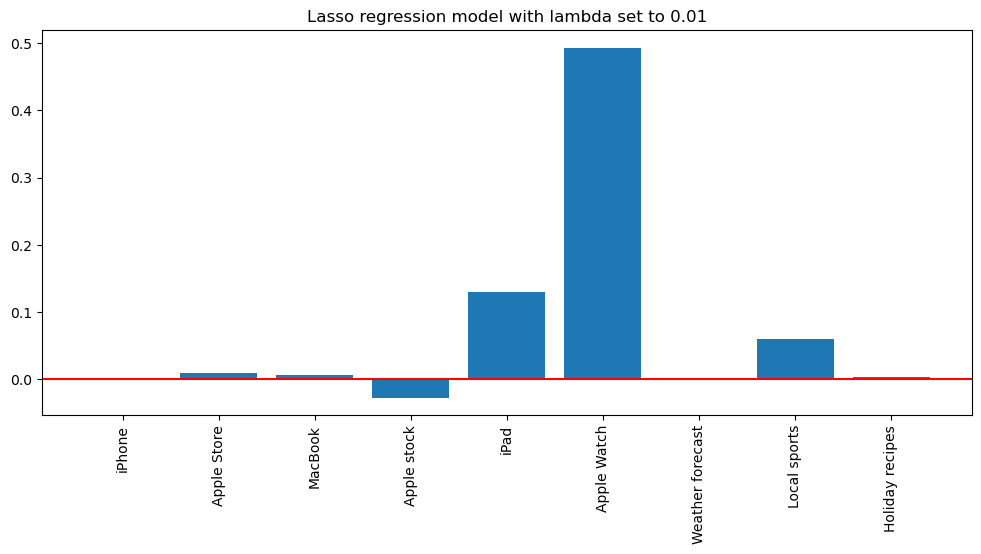

In [50]:
plt.figure(figsize=(12, 5))
plt.bar(range(len(lasso_coefficients)), lasso_coefficients)
plt.xticks(range(len(lasso_coefficients)), X.columns, rotation='vertical')
plt.axhline(0, color="red")
plt.title('Lasso regression model with lambda set to 0.01')
plt.show()

# 5.) Do these coefficient magnitudes make sense?

In my opinion, the keywords used in Lasso regression, such as 'iPhone,' 'Apple Store,' 'MacBook,' 'iPad,' and 'Apple Watch,' are directly related to Apple's products and may reflect consumer interest or market trends relevant to Apple's sales and financial performance. Therefore, it doesn't make sense that the coefficient magnitudes, when lambda (α) is set to zero indicating no regularization, imply no relationship.

**Model 1 (Lambda = 0.5):**
- MSE: 0.2713355227387251
- R-squared: -0.03546415645602541


**Model 2 (Lambda = 0.01):**
- MSE: 0.02409315839084764
- R-squared: 0.9080562630438807

Model Analysis:
- Mean Squared Error (MSE)


Model 1 has a higher MSE (0.2713) compared to Model 2, which has a lower MSE (0.0241). A lower MSE indicates that the model's predictions are closer to the actual values, suggesting that Model 2 is more accurate in predicting the outcome.

- R-squared:

Model 1 has a negative R-squared (-0.0355), which is an indication of poor model fit. Model 2, on the other hand, has a high R-squared of 0.9081, indicating that it explains about 90.81% of the variance in the target variable.


**Model 2, with lambda set to 0.01, significantly outperforms Model 1, with lambda set to 0.5, in both MSE and R-squared metrics.**


However, considering Lasso regression objective function which could be expressed as:


$$
\min_{\beta} \left\{ \frac{1}{N} \sum_{i=1}^{N} (y_i - x_i^T \beta)^2 + \lambda \sum_{j=1}^{p} |\beta_j| \right\}
$$

Where:
$$
\begin{align*}
N & \text{ is the number of observations.} \\
y_i & \text{ is the response variable for the } i\text{-th observation.} \\
x_i & \text{ is the vector of predictor variables for the } i\text{-th observation.} \\
\beta & \text{ is the vector of coefficients to be estimated.} \\
\lambda & \textbf{ is the regularization parameter that controls the amount of shrinkage applied to the coefficients.} \\
p & \text{ is the number of predictors.}
\end{align*}
$$


- The reason why all coefficients become zero in the first model when lambda (α) is set to 0.5, but they have distinct values when lambda is set to 0.01 in Lasso regression, can be attributed to the varying intensity of regularization applied by the Lasso algorithm. When lambda is assigned a relatively high value (e.g., 0.5), it enforces a robust regularization penalty. This penalty encourages the model to possess smaller coefficient values and can force some coefficients to precisely reach zero, effectively carrying out feature selection. Consequently, the regularization term becomes the dominant factor in the optimization process, and the algorithm's primary aim becomes minimizing the magnitude of the coefficients.
- Thus, the choice of lambda (α) in Lasso regression plays a pivotal role in deciding how the model balances between the complexity of the model (i.e., the number of features used) and its predictive accuracy. It underscores the necessity of finding the lambda value that best suits the characteristics of your dataset.

